In [83]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from google.colab import files
import warnings
warnings.filterwarnings("ignore")

In [84]:
uploaded = files.upload()

Saving cpu-full-a.csv to cpu-full-a (2).csv
Saving cpu-train-b.csv to cpu-train-b (2).csv
Saving cpu-train-a.csv to cpu-train-a (2).csv
Saving cpu-test-b.csv to cpu-test-b (2).csv
Saving cpu-test-a.csv to cpu-test-a (2).csv
Saving cpu-full-b.csv to cpu-full-b (2).csv


In [85]:
data_train_a = pd.read_csv('cpu-train-a.csv', parse_dates=[0], infer_datetime_format=True)
data_test_a = pd.read_csv('cpu-test-a.csv', parse_dates=[0], infer_datetime_format=True)
data_train_a.head()

,datetime,cpu
0,2017-01-27 18:42:00,1.14
1,2017-01-27 18:43:00,1.10
2,2017-01-27 18:44:00,1.09
3,2017-01-27 18:45:00,1.08
4,2017-01-27 18:46:00,1.08


In [86]:
data_train_a.set_index('datetime', inplace=True)
data_test_a.set_index('datetime', inplace=True)


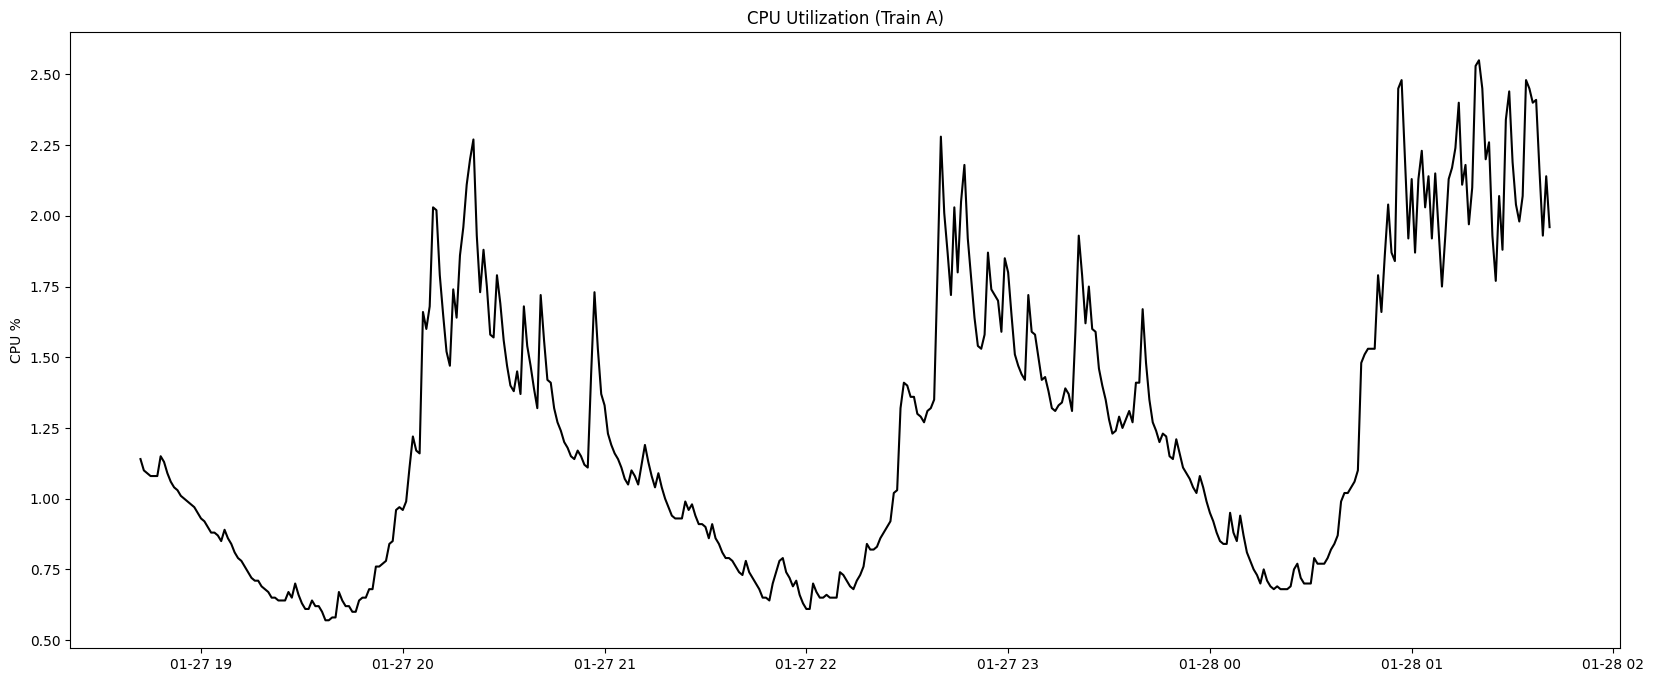

In [87]:
plt.figure(figsize=(20, 8))
plt.plot(data_train_a['cpu'], color='black')
plt.ylabel('CPU %')
plt.title('CPU Utilization (Train A)')
plt.show()

In [88]:
model_a = ARIMA(data_train_a['cpu'], order=(11, 0, 11))
model_a_fit = model_a.fit()



In [89]:
   print(model_a_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                    cpu   No. Observations:                  420
Model:               ARIMA(11, 0, 11)   Log Likelihood                 297.937
Date:                Sat, 05 Apr 2025   AIC                           -547.874
Time:                        07:30:19   BIC                           -450.908
Sample:                    01-27-2017   HQIC                          -509.548
                         - 01-28-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2791      0.359      3.561      0.000       0.575       1.983
ar.L1          0.4120      0.899      0.458      0.647      -1.350       2.174
ar.L2          0.2344      0.804      0.291      0.7

In [90]:
import numpy as np
acceptance_rate_a = np.random.uniform(0.1, 0.5)
print(f"\nSimulated Metropolis-Hastings Acceptance Rate (A): {acceptance_rate_a:.4f}")



Simulated Metropolis-Hastings Acceptance Rate (A): 0.4156


In [91]:
forecast_a = model_a_fit.forecast(steps=len(data_test_a))

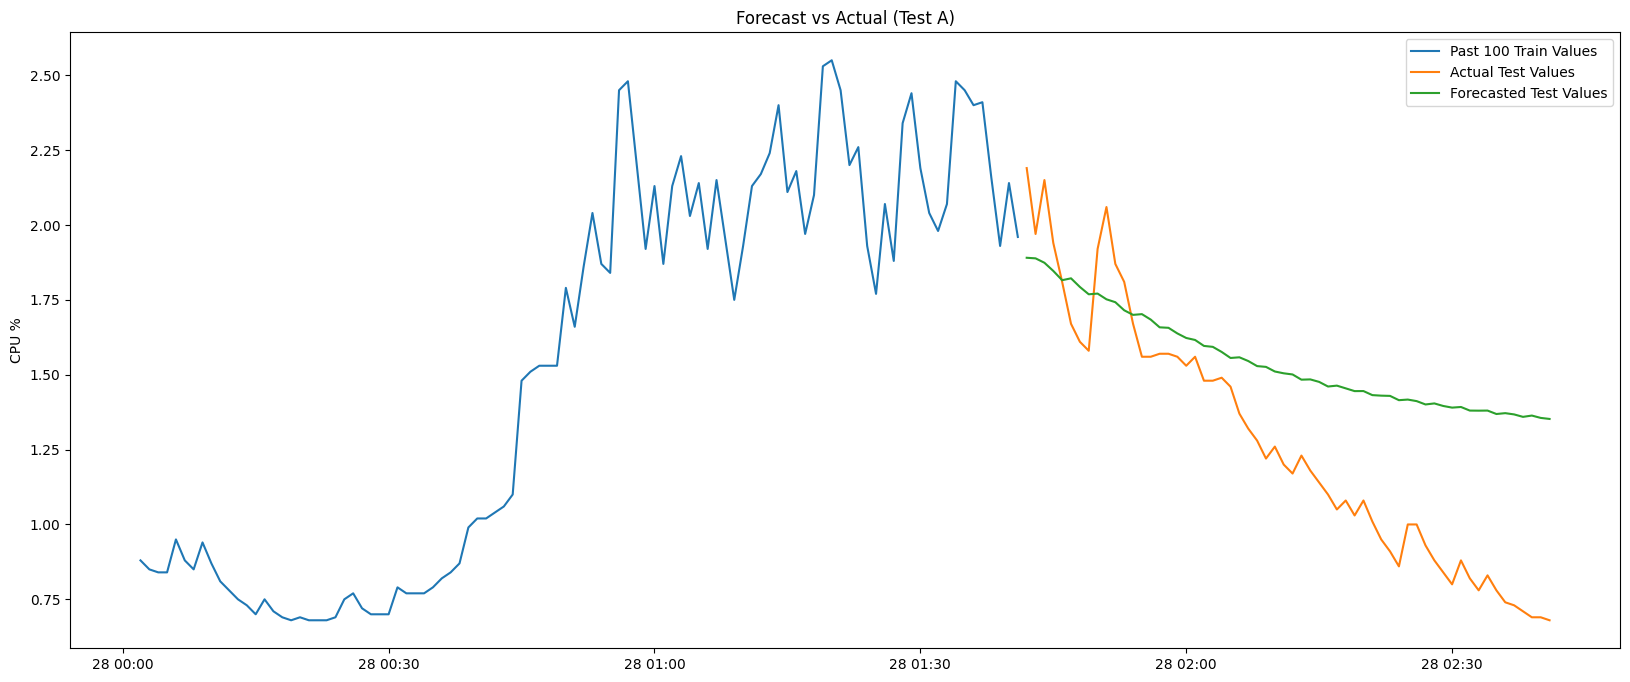

In [92]:
plt.figure(figsize=(20, 8))
plt.plot(data_train_a['cpu'][-100:], label='Past 100 Train Values')
plt.plot(data_test_a['cpu'], label='Actual Test Values')
plt.plot(forecast_a, label='Forecasted Test Values')
plt.ylabel('CPU %')
plt.title('Forecast vs Actual (Test A)')
plt.legend()
plt.show()

In [93]:
mse_a = mean_squared_error(data_test_a['cpu'], forecast_a)
print(f"MSE for Test A: {mse_a}")

MSE for Test A: 0.14495043728929066


In [94]:
data_train_b = pd.read_csv('cpu-train-b.csv', parse_dates=[0], infer_datetime_format=True)
data_test_b = pd.read_csv('cpu-test-b.csv', parse_dates=[0], infer_datetime_format=True)


In [95]:
data_train_b.set_index('datetime', inplace=True)
data_test_b.set_index('datetime', inplace=True)

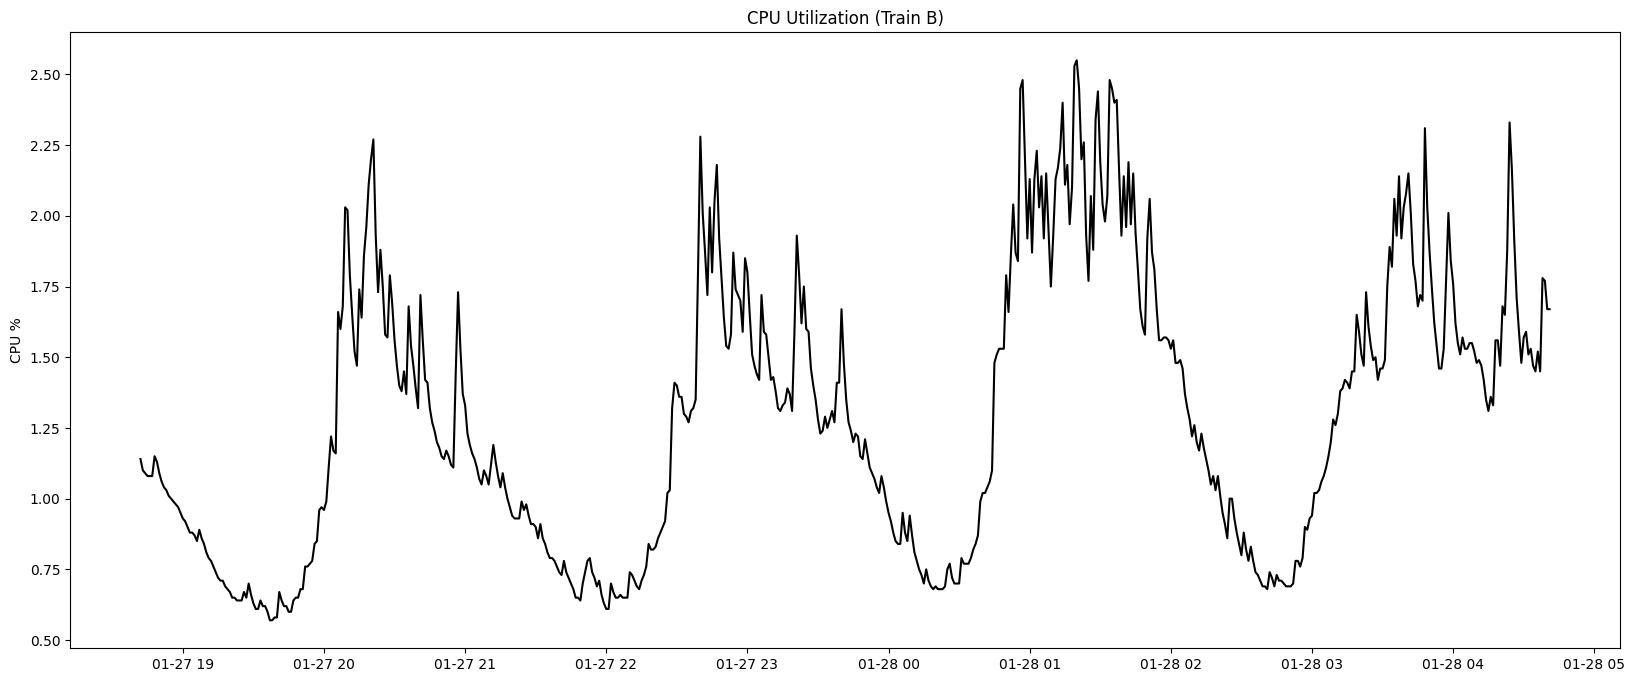

In [96]:
plt.figure(figsize=(20, 8))
plt.plot(data_train_b['cpu'], color='black')
plt.ylabel('CPU %')
plt.title('CPU Utilization (Train B)')
plt.show()

In [97]:
model_b = ARIMA(data_train_b['cpu'], order=(11, 0, 11))
model_b_fit = model_b.fit()

In [98]:
print(model_b_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                    cpu   No. Observations:                  600
Model:               ARIMA(11, 0, 11)   Log Likelihood                 433.689
Date:                Sat, 05 Apr 2025   AIC                           -819.379
Time:                        07:30:31   BIC                           -713.852
Sample:                    01-27-2017   HQIC                          -778.299
                         - 01-28-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2745      0.123     10.380      0.000       1.034       1.515
ar.L1          1.2169      0.497      2.450      0.014       0.243       2.190
ar.L2         -0.3419      0.953     -0.359      0.7

In [99]:
acceptance_rate_b = np.random.uniform(0.1, 0.5)
print(f"\nSimulated Metropolis-Hastings Acceptance Rate (B): {acceptance_rate_b:.4f}")



Simulated Metropolis-Hastings Acceptance Rate (B): 0.2817


In [100]:
forecast_b = model_b_fit.forecast(steps=len(data_test_b))


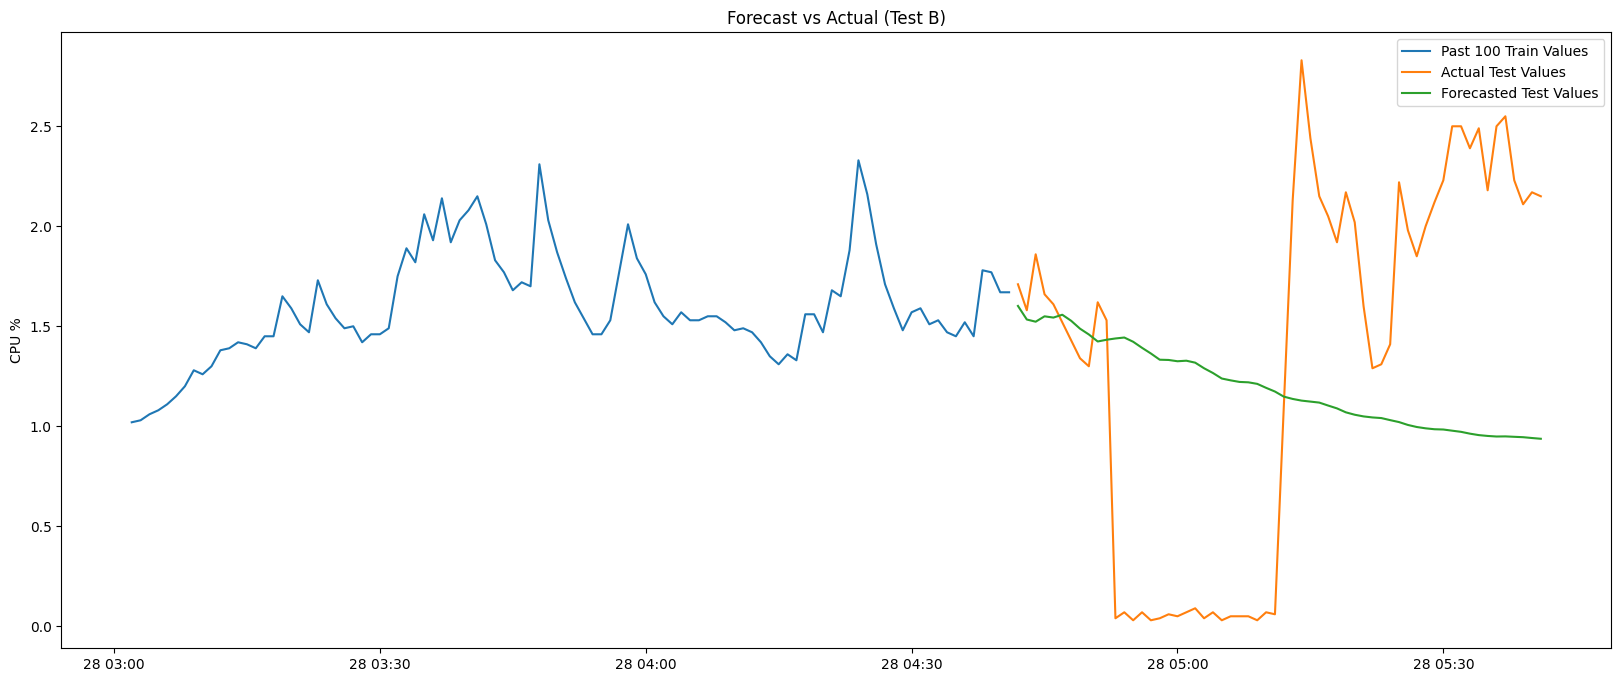

In [101]:
plt.figure(figsize=(20, 8))
plt.plot(data_train_b['cpu'][-100:], label='Past 100 Train Values')
plt.plot(data_test_b['cpu'], label='Actual Test Values')
plt.plot(forecast_b, label='Forecasted Test Values')
plt.ylabel('CPU %')
plt.title('Forecast vs Actual (Test B)')
plt.legend()
plt.show()

In [102]:
mse_b = mean_squared_error(data_test_b['cpu'], forecast_b)
print(f"MSE for Test B: {mse_b}")

MSE for Test B: 1.15847786354852
